In [1]:
%matplotlib inline
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from PIL import Image
# CV reads by BGR
import pandas as pd

In [2]:
# add noise
def noisy(noise_typ,image):
    if noise_typ == "gaussian":
        row,col,ch= image.shape
        mean = 0
        var = [0.5, 0.001]
        sigma1 = var[0]**0.5
        gauss1 = np.random.normal(mean,sigma1,(row,col,ch))
        gauss1 = gauss1.reshape(row,col,ch)
        noisy1 = image + gauss1*255.0
        sigma2 = var[1]**0.5
        gauss2 = np.random.normal(mean,sigma2,(row,col,ch))
        gauss2 = gauss1.reshape(row,col,ch)
        noisy2 = image + gauss2*255.0
        return noisy1, noisy2
    elif noise_typ == "salt_and_pepper":
        row,col,ch = image.shape
        s_vs_p = [0.5,0.001]
        amount = 0.01
        out1 = np.copy(image)
        out2 = np.copy(image)
        # Salt mode
        num_salt1 = np.ceil(amount * image.size * s_vs_p[0])
        coords = [np.random.randint(0, i - 1, int(num_salt1))
              for i in image.shape]
        out1[coords] = 1
        
        num_salt2 = np.ceil(amount * image.size * s_vs_p[1])
        coords = [np.random.randint(0, i - 1, int(num_salt2))
              for i in image.shape]
        out2[coords] = 1

        # Pepper mode
        num_pepper1 = np.ceil(amount* image.size * (1. - s_vs_p[0]))
        coords = [np.random.randint(0, i - 1, int(num_pepper1))
              for i in image.shape]
        out1[coords] = 0
    
        num_pepper2 = np.ceil(amount* image.size * (1. - s_vs_p[1]))
        coords = [np.random.randint(0, i - 1, int(num_pepper2))
              for i in image.shape]
        out2[coords] = 0
        return out1, out2

/home/chella/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/chella/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/chella/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will

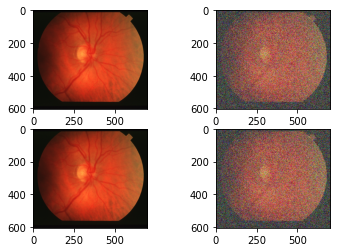

In [3]:
image = cv2.imread('29.ppm')
pepper_image1, pepper_image2 = noisy('salt_and_pepper', image)
gauss_image1, gauss_image2 = noisy('gaussian', image)
cv2.imwrite('pepper1.png',pepper_image1)
cv2.imwrite('gauss1.png', gauss_image1)
cv2.imwrite('pepper2.png',pepper_image2)
cv2.imwrite('gauss2.png', gauss_image2)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.imshow(Image.open('pepper1.png'))
ax2.imshow(Image.open('gauss1.png'))
ax3.imshow(Image.open('pepper2.png'))
ax4.imshow(Image.open('gauss2.png'))

In [4]:
def mean_filter(img):
    return cv2.blur(img,(5,5))

In [5]:
def gaussian_filter(img):
    return cv2.GaussianBlur(img,(5,5),0)

In [6]:
def median_filter(img):
    return cv2.medianBlur(img,5)

In [7]:
def CLAHE(bgr_image):
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv_planes[0] = clahe.apply(hsv_planes[0])
    hsv_planes[1] = clahe.apply(hsv_planes[1])
    hsv = cv2.merge(hsv_planes)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

In [8]:
rgb_noisy_images = ['pepper1.png','pepper2.png', 'gauss1.png', 'gauss2.png']

In [9]:
def components(image):
    red = np.zeros(shape=(605,700))
    green = np.zeros(shape=(605,700))
    blue = np.zeros(shape=(605,700))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            blue[i][j] = image[i][j][0]
            green[i][j] = image[i][j][1]
            red[i][j] = image[i][j][2]
    return np.array(red), np.array(green), np.array(blue)

In [10]:
def combine(blue,green,red):
    rgb_image = np.zeros(shape=(605,700,3))
    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            rgb_image[i][j][0] = blue[i][j]
            rgb_image[i][j][1] = green[i][j]
            rgb_image[i][j][2] = red[i][j]
    return np.array(rgb_image)

In [11]:
rgb_enhanced_image = []

In [12]:
for i in range(len(rgb_noisy_images)):
    image = cv2.imread(rgb_noisy_images[i])
    
    # apply filters
    mean_image = mean_filter(image)
    gaussian_image = gaussian_filter(image)
    median_image = median_filter(image)
    
    mean_clahe = CLAHE(mean_image)
    gaussian_clahe = CLAHE(gaussian_image)
    median_clahe = CLAHE(median_image)

    rgb_enhanced_image.append((mean_clahe,gaussian_clahe,median_clahe))

In [13]:
rgb_enhanced_image = np.array(rgb_enhanced_image)

In [14]:
rgb_enhanced_image.shape

(4, 3, 605, 700, 3)

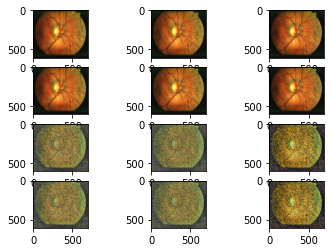

In [15]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3)
ax1.imshow(cv2.cvtColor(rgb_enhanced_image[0][0], cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(rgb_enhanced_image[0][1], cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(rgb_enhanced_image[0][2], cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(rgb_enhanced_image[1][0], cv2.COLOR_BGR2RGB))
ax5.imshow(cv2.cvtColor(rgb_enhanced_image[1][1], cv2.COLOR_BGR2RGB))
ax6.imshow(cv2.cvtColor(rgb_enhanced_image[1][2], cv2.COLOR_BGR2RGB))
ax7.imshow(cv2.cvtColor(rgb_enhanced_image[2][0], cv2.COLOR_BGR2RGB))
ax8.imshow(cv2.cvtColor(rgb_enhanced_image[2][1], cv2.COLOR_BGR2RGB))
ax9.imshow(cv2.cvtColor(rgb_enhanced_image[2][2], cv2.COLOR_BGR2RGB))
ax10.imshow(cv2.cvtColor(rgb_enhanced_image[3][0], cv2.COLOR_BGR2RGB))
ax11.imshow(cv2.cvtColor(rgb_enhanced_image[3][1], cv2.COLOR_BGR2RGB))
ax12.imshow(cv2.cvtColor(rgb_enhanced_image[3][2], cv2.COLOR_BGR2RGB))

In [16]:
from math import log10, sqrt 
import cv2 
import numpy as np 
  
def PSNR(original, given): 
    mse = np.mean((original - given) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [17]:
scores = []

In [18]:
for i in range(4):
    psnr_mean = PSNR(cv2.imread('29.ppm'), rgb_enhanced_image[i][0])
    psnr_gaussian = PSNR(cv2.imread('29.ppm'), rgb_enhanced_image[i][1])
    psnr_median = PSNR(cv2.imread('29.ppm'), rgb_enhanced_image[i][2])
    scores.append((psnr_mean, psnr_gaussian, psnr_median))

In [19]:
scores = pd.DataFrame(scores)

In [20]:
scores.columns=['mean+clahe', 'gaussian+clahe', 'median+clahe']

In [21]:
scores['noise type'] = ['saltnpepper','saltnpepper','gaussian', 'gaussian']

In [22]:
scores['variance'] = [0.5,0.001,0.5,0.001]

In [23]:
print('PSNR score - original-image vs reconstructed-image')
print(scores)

PSNR score - original-image vs reconstructed-image
   mean+clahe  gaussian+clahe  median+clahe   noise type  variance
0   30.075913       29.955122     30.275036  saltnpepper     0.500
1   30.065988       29.944413     30.277530  saltnpepper     0.001
2   27.856941       27.947606     27.914125     gaussian     0.500
3   27.856941       27.947606     27.914125     gaussian     0.001


In [24]:
scores = []
for i in range(4):
    psnr_mean = PSNR(cv2.imread(rgb_noisy_images[i]), rgb_enhanced_image[i][0])
    psnr_gaussian = PSNR(cv2.imread(rgb_noisy_images[i]), rgb_enhanced_image[i][1])
    psnr_median = PSNR(cv2.imread(rgb_noisy_images[i]), rgb_enhanced_image[i][2])
    scores.append((psnr_mean, psnr_gaussian, psnr_median))

In [25]:
scores = pd.DataFrame(scores)
scores.columns=['mean+clahe', 'gaussian+clahe', 'median+clahe']
scores['noise type'] = ['saltnpepper','saltnpepper','gaussian', 'gaussian']
scores['variance'] = [0.5,0.001,0.5,0.001]
print('PSNR score - noisy-image vs reconstructed-image')
print(scores)

PSNR score - noisy-image vs reconstructed-image
   mean+clahe  gaussian+clahe  median+clahe   noise type  variance
0   30.036570       29.914122     30.236269  saltnpepper     0.500
1   30.027054       29.904381     30.241009  saltnpepper     0.001
2   27.820773       27.845020     28.454182     gaussian     0.500
3   27.820773       27.845020     28.454182     gaussian     0.001
